In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from scipy.stats import norm


In [2]:
df = pd.read_csv(r"F:\data analysis\3rd project\data sets\train.csv")


In [3]:
# a function to display table with suitable size
def display_scrollable_table(df, max_height='300px', max_width='800px'):
    """
    Display a pandas DataFrame in a scrollable table format.

    Parameters:
    - df: pandas DataFrame to display
    - max_height: Maximum height of the scrollable area
    - max_width: Maximum width of the scrollable area
    """
    # Create a HTML table representation of the DataFrame
    table_html = df.to_html()

    # Create a HTML widget
    html_widget = widgets.HTML(value=table_html)

    # Create a box layout with a scrollbar
    scrollable_area = widgets.Box([html_widget])
    scrollable_area.layout.overflow = 'auto'
    scrollable_area.layout.max_height = max_height
    scrollable_area.layout.max_width = max_width
    scrollable_area.layout.border = '1px solid black'

    # Display the widget
    display(scrollable_area)


In [4]:
display_scrollable_table(df.head(20))

Box(children=(HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">…

In [5]:
#discovering numeric value
display_scrollable_table(df.describe().T)
''' 
cocluding some insghts
    1- some misssing data in lotfrontage , MasVnrArea
    2- sale price has standard deviation of 79442.502883 which means house sale price vary agressively
    3- Also lot Area varies alot( standard deviation)
    4-most sales occurred in june
'''


Box(children=(HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">…

' \ncocluding some insghts\n    1- some misssing data in lotfrontage , MasVnrArea\n    2- sale price has standard deviation of 79442.502883 which means house sale price vary agressively\n    3- Also lot Area varies alot( standard deviation)\n    4-most sales occurred in june\n'

In [6]:
# Summary statistics for categorical features
category = df.select_dtypes(include = 'object')
display_scrollable_table(category.describe().T)
''' 
cocluding some insghts
    1- some misssing data in Alley , FireplaceQu
    2-Most Street are paved, while alley is Grvl
 ........ etc
'''



Box(children=(HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">…

' \ncocluding some insghts\n    1- some misssing data in Alley , FireplaceQu\n    2-Most Street are paved, while alley is Grvl\n ........ etc\n'

In [7]:
# Null values in the dataset
display_scrollable_table((df.isnull().sum()*100 /len(df) ).to_frame())



Box(children=(HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">…

c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


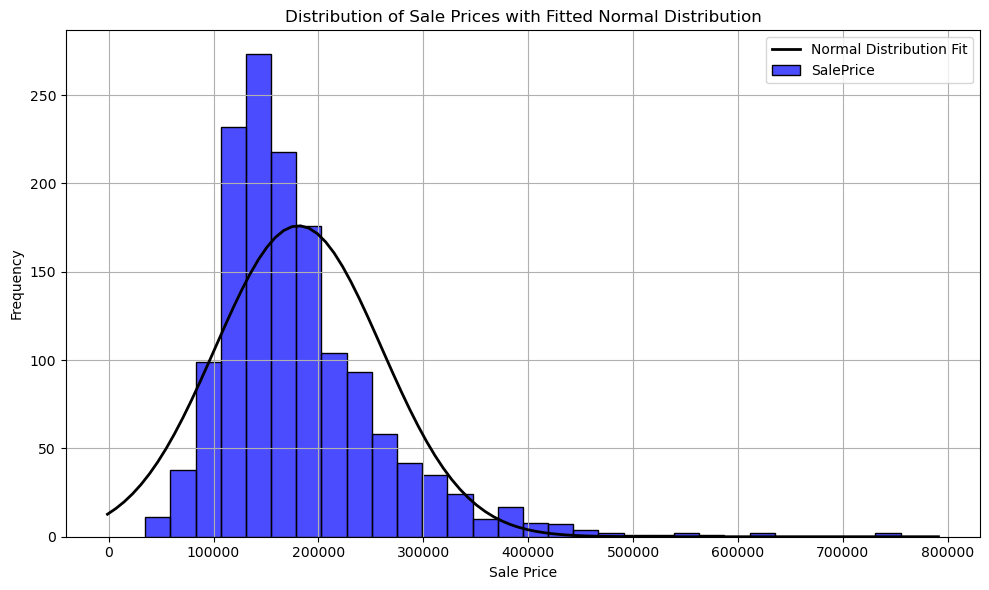

In [8]:
#ploting Sales price Dist.
sales_price = df['SalePrice']

# Fit a normal distribution to the SalePrice data
mu, sigma = norm.fit(sales_price)

# Create a histogram of the SalePrice column
plt.figure(figsize=(10, 6))
sns.histplot(sales_price, kde=False, bins=30, color='blue', alpha=0.7, label='SalePrice')

# Calculate the normal distribution based on the fitted parameters
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Create the normal distribution overlay
bin_edges = np.histogram_bin_edges(sales_price, bins=30)
bin_width = np.diff(bin_edges)[0]
scaled_p = p * len(sales_price) * bin_width
plt.plot(x, scaled_p, 'k', linewidth=2, label='Normal Distribution Fit')

# Combine the histogram and the overlay
plt.title('Distribution of Sale Prices with Fitted Normal Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Set the layout for the plot
plt.tight_layout()
plt.show()

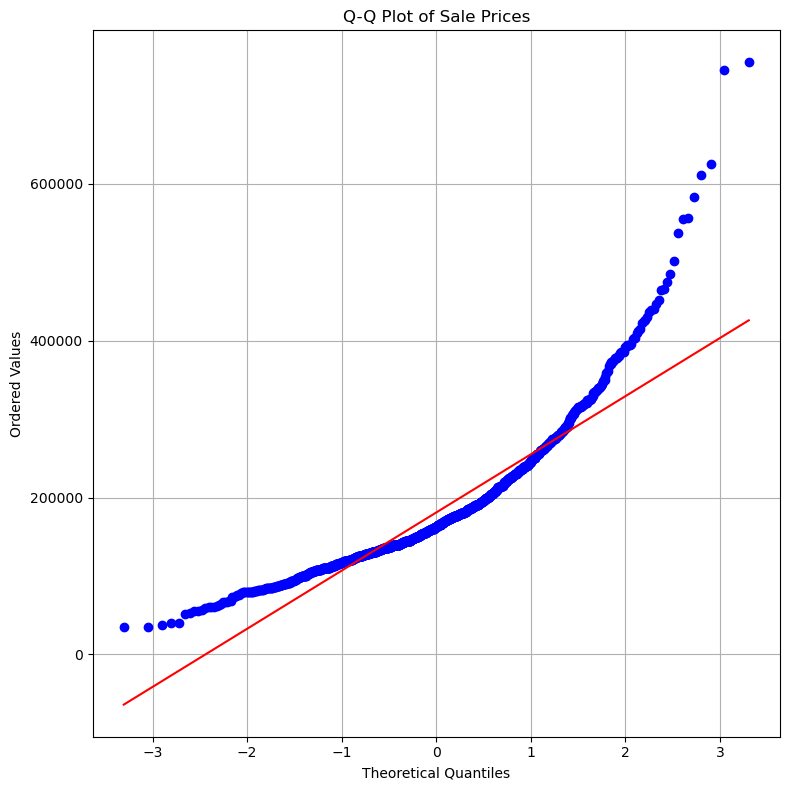

In [9]:
# Create a Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(sales_price, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.tight_layout()
plt.show()




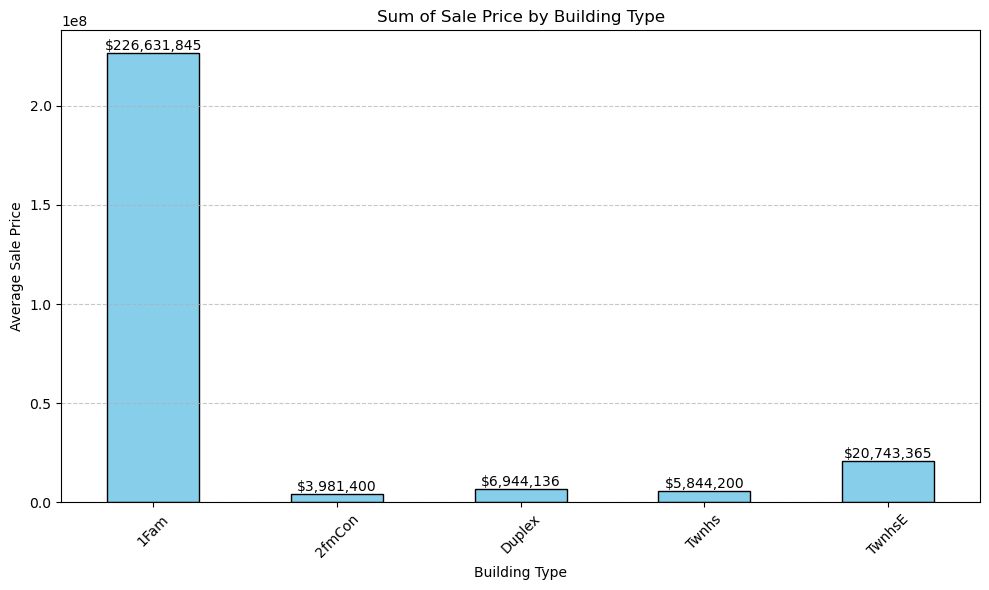

In [10]:
#now let's analyze some specs about Data
# 1- Distribution of dwelling types and their relation to sale prices?
my_dwelling_types = df['BldgType']
my_dwelling_types_to_salesPrice = df.groupby('BldgType')['SalePrice'].sum()
my_dwelling_types_to_salesPrice
# now let's visualize this
plt.figure(figsize=(10, 6))
my_dwelling_types_to_salesPrice.plot(kind='bar', color='skyblue', edgecolor='black')
for i, price in enumerate(my_dwelling_types_to_salesPrice):
    plt.text(i, price, f'${price:,.0f}', ha='center', va='bottom')
plt.title('Sum of Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
# we can conclude that Single-family Detached  Are best sales


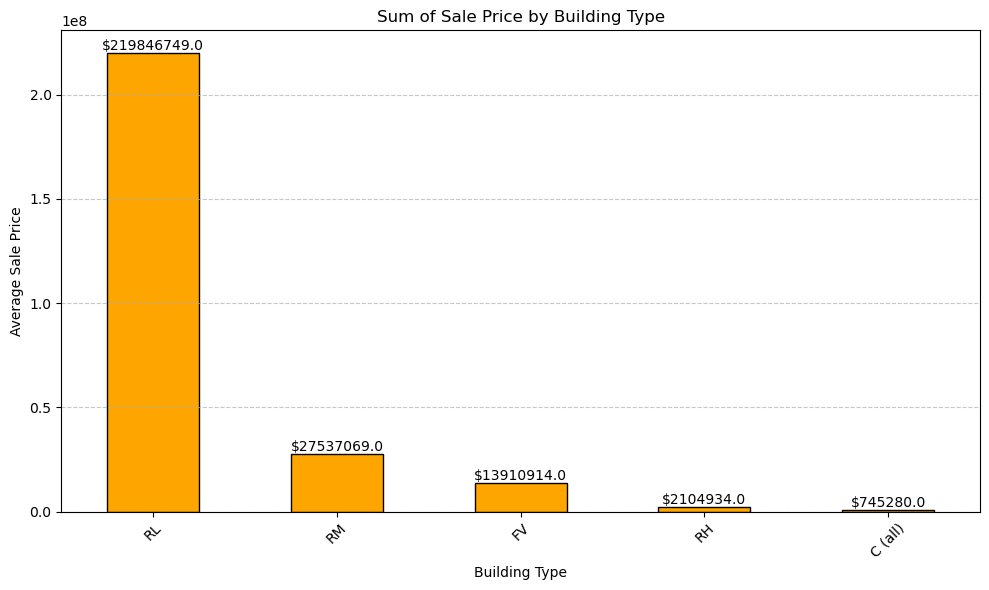

In [11]:
# 2- Does Zoning impact Sales price
my_Zoning_types = df['MSZoning']
my_Zoning_types_to_salesPrice = df.groupby('MSZoning')['SalePrice'].sum().sort_values(ascending= False)
# now let's visualize this
plt.figure(figsize=(10, 6))
my_Zoning_types_to_salesPrice.plot(kind='bar', color='orange', edgecolor='black')
for i, price in enumerate(my_Zoning_types_to_salesPrice):
    plt.text(i, price,f'${price:.01f}' ,ha='center', va = 'bottom')
plt.title('Sum of Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# we can conclude that Residential Low Density  is the best sales


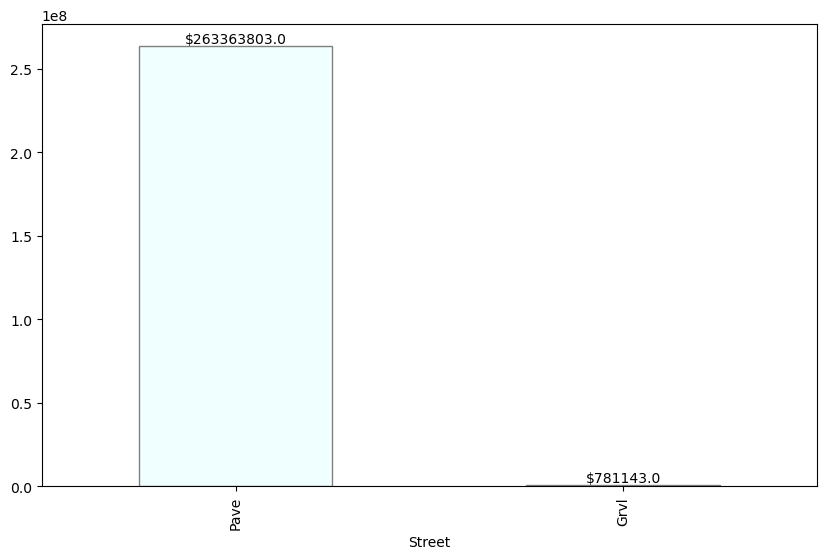

In [12]:
# 3-Does street and alley access types effect on sale price? 
my_street_types = df['Street']
my_street_types_to_salesPrice = df.groupby('Street')['SalePrice'].sum().sort_values(ascending= False)
my_street_types_to_salesPrice
#let's visualize this
plt.figure(figsize=(10, 6))
my_street_types_to_salesPrice.plot(kind='bar', color='azure', edgecolor='gray')
for i, price in enumerate(my_street_types_to_salesPrice):
    plt.text(i, price,f'${price:.01f}' ,ha='center', va = 'bottom')
# Abslutly we can notice that Pave type has more impact than Grvl concerning sales


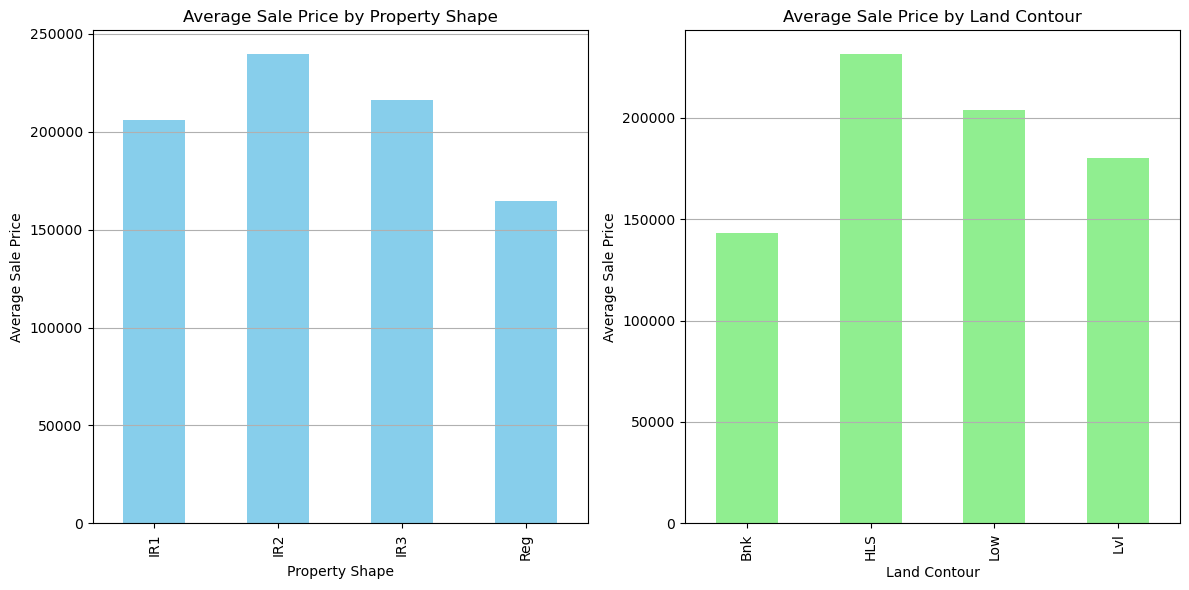

In [13]:


#  3-Does property shape and  land contour  effect on sale price?

# Calculate the average sale price by property shape
my_prop_shape = df.groupby('LotShape')['SalePrice'].mean()

# Calculate the average sale price by land contour
my_land_contour = df.groupby('LandContour')['SalePrice'].mean()

# Plot the average sale price by property shape
plt.figure(figsize=(12, 6))  # Adjust the figure size if necessary

plt.subplot(1, 2, 1)  # Create a subplot for property shape
my_prop_shape.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Property Shape')
plt.xlabel('Property Shape')
plt.ylabel('Average Sale Price')
plt.grid(axis='y')

# Plot the average sale price by land contour
plt.subplot(1, 2, 2)  # Create a subplot for land contour
my_land_contour.plot(kind='bar', color='lightgreen')
plt.title('Average Sale Price by Land Contour')
plt.xlabel('Land Contour')
plt.ylabel('Average Sale Price')
plt.grid(axis='y')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()




Correlation between Age and Sale Price =   -0.523350417546816


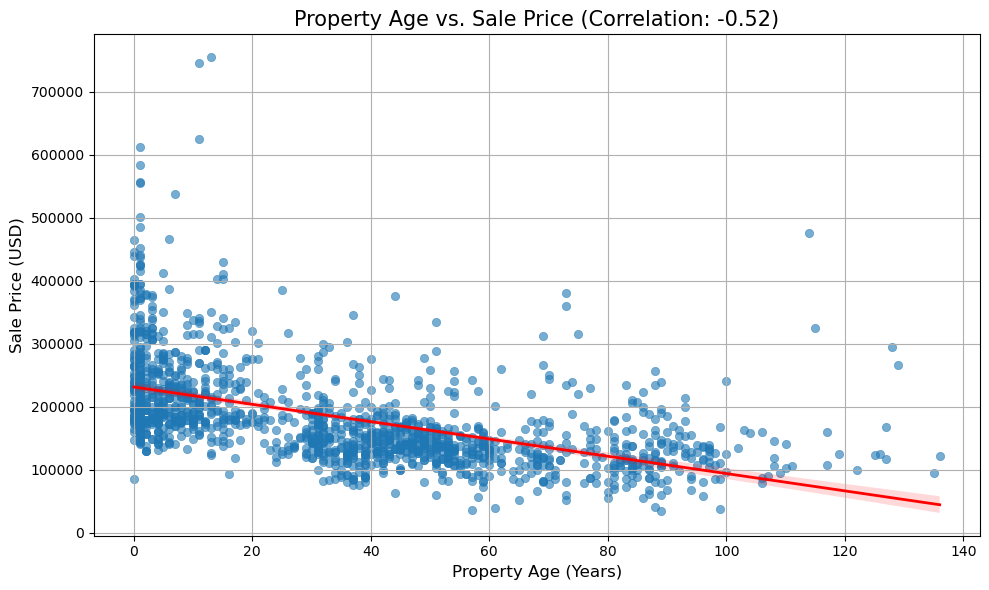

In [14]:
# 4- Is there a Correlation between Property Age and Sale Price
df['property_age'] =  df['YrSold'] - df['YearBuilt']
matrix = df['property_age'].corr(df['SalePrice'])
print(f'Correlation between Age and Sale Price =   {matrix}')
# Enhanced scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['property_age'], y=df['SalePrice'], alpha=0.6, edgecolor=None)

# Add a regression line
sns.regplot(x='property_age', y='SalePrice', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

# Add title and labels
plt.title(f'Property Age vs. Sale Price (Correlation: {matrix:.2f})', fontsize=15)
plt.xlabel('Property Age (Years)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Correlation between Age and Sale Price =   0.7086244776126522


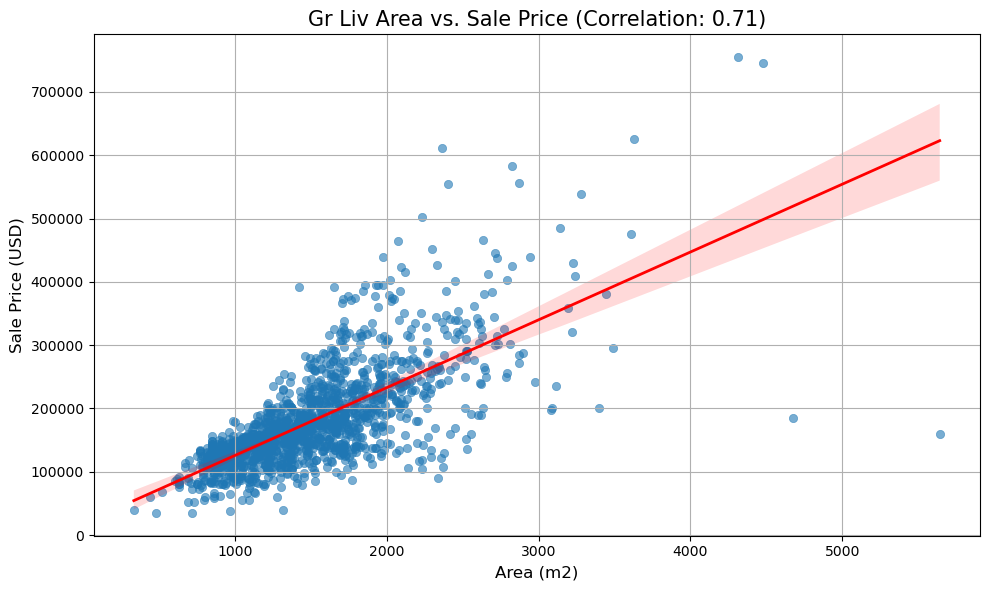

In [15]:
# 5- Is there a Correlation between Living Area and Sale Price
my_corr_bet_Area_Saleprice =  df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Age and Sale Price =   {my_corr_bet_Area_Saleprice}')
# Enhanced scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], alpha=0.6, edgecolor=None)

# Add a regression line
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

# Add title and labels
plt.title(f'Gr Liv Area vs. Sale Price (Correlation: {my_corr_bet_Area_Saleprice:.2f})', fontsize=15)
plt.xlabel('Area (m2)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
# 6 - does prie change over years 
average_price_per_year = df.groupby('YrSold')['SalePrice'].mean()


<Figure size 800x600 with 0 Axes>

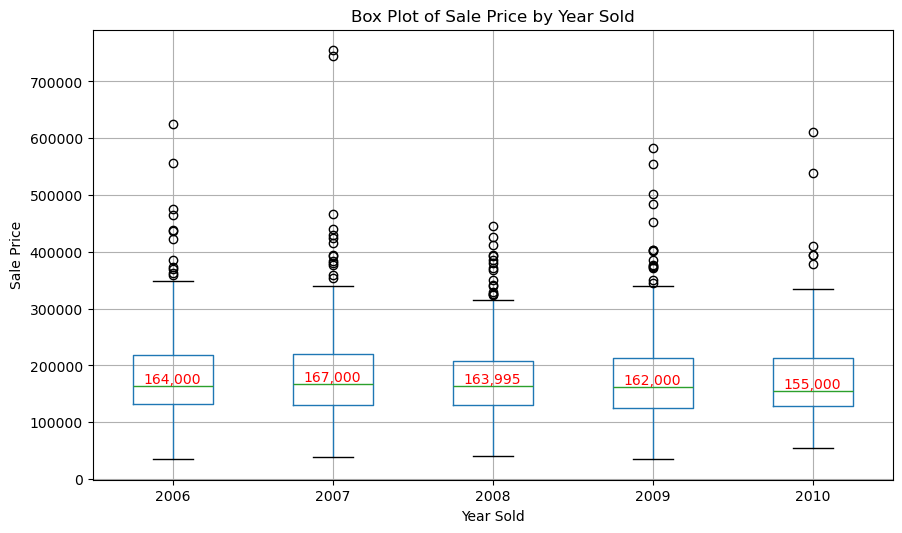

In [17]:
# Does price change year to year?
median_salePrice = df.groupby('YrSold')['SalePrice'].median()

# Plot the box plot
plt.figure(figsize=(8,6))
bp = df.boxplot(column='SalePrice', by='YrSold', figsize=(10,6))

# Add median values to the plot
for i, year in enumerate(df['YrSold'].unique()):
    plt.text(i + 1, median_salePrice[year], f'{median_salePrice[year]:,.0f}', ha='center', va='bottom', color='red')

# Set labels and title
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Year Sold')

# Remove automatic title
plt.suptitle('')

plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


# Define target and features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Separate numerical and categorical variables
num_var = X.select_dtypes(include=['int64', 'float64']).columns
cat_var = X.select_dtypes(include=['object']).columns

# Create transformers using pipelines
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Group columns with transformers
col_trans = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_var),
        ('cat', cat_trans, cat_var)
    ]
)

# Split the raw data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a final pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans),
    ('pca', PCA()),  # Include PCA here
    ('model', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid for tuning
param_grid = {
    'pca__n_components': [0.95],  # Set the variance threshold for PCA
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
preprocessor= grid_search.fit(X_train, y_train)

# Print the best parameters found during the search
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the model on the test data
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for Random Forest: {rmse}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 500, 'pca__n_components': 0.95}
RMSE for Random Forest: 32056.752498561254
